## test bleach correction

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from pathlib import Path
from pystripe.core import imread_tif_raw_png, glob_re, log1p_jit, expm1_jit, correct_bleaching
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu


files_path = Path(r"/qnap/SmartSPIM_Data/2023_04_02/20230402_10_49_31_SM220712_01_LS_15x_800z/Ex_488_Em_525_MIP")
for file in glob_re(r"tiff?", files_path):
    img = imread_tif_raw_png(file)
    if img.min() < img.max():
        img_filtered = log1p_jit(img)
        threshold = threshold_otsu(img_filtered)
        print(threshold)
        if threshold < 3:
            continue
        
        img_filtered = expm1_jit(correct_bleaching(img_filtered, 0.0005, noise=3.0, clip_min=None, clip_max=None, max_method=True))
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
        axes[0].imshow(img, cmap='gray', vmin=0, vmax=2047)
        axes[0].set_title("original")
        axes[1].imshow(img_filtered, cmap='gray', vmin=0, vmax=2047)
        axes[1].set_title("bleach corrected")
        plt.tight_layout()
        plt.show()

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from pathlib import Path
from numpy import rot90
from pystripe.core import imread_tif_raw_png, filter_streaks
import matplotlib.pyplot as plt

file = Path(r"/data/20230402_10_49_31_SM220712_01_LS_15x_800z_stitched/Ex_488_Em_525_tif/img_002000.tif")
img = rot90(imread_tif_raw_png(file))
# img_log1p = log1p_jit(img)
# pad_y, pad_x = [_ % 2 for _ in img_log1p.shape]
# if pad_y == 1 or pad_x == 1:
#     img_log1p = pad(img_log1p, ((0, pad_y), (0, pad_x)), mode="edge")

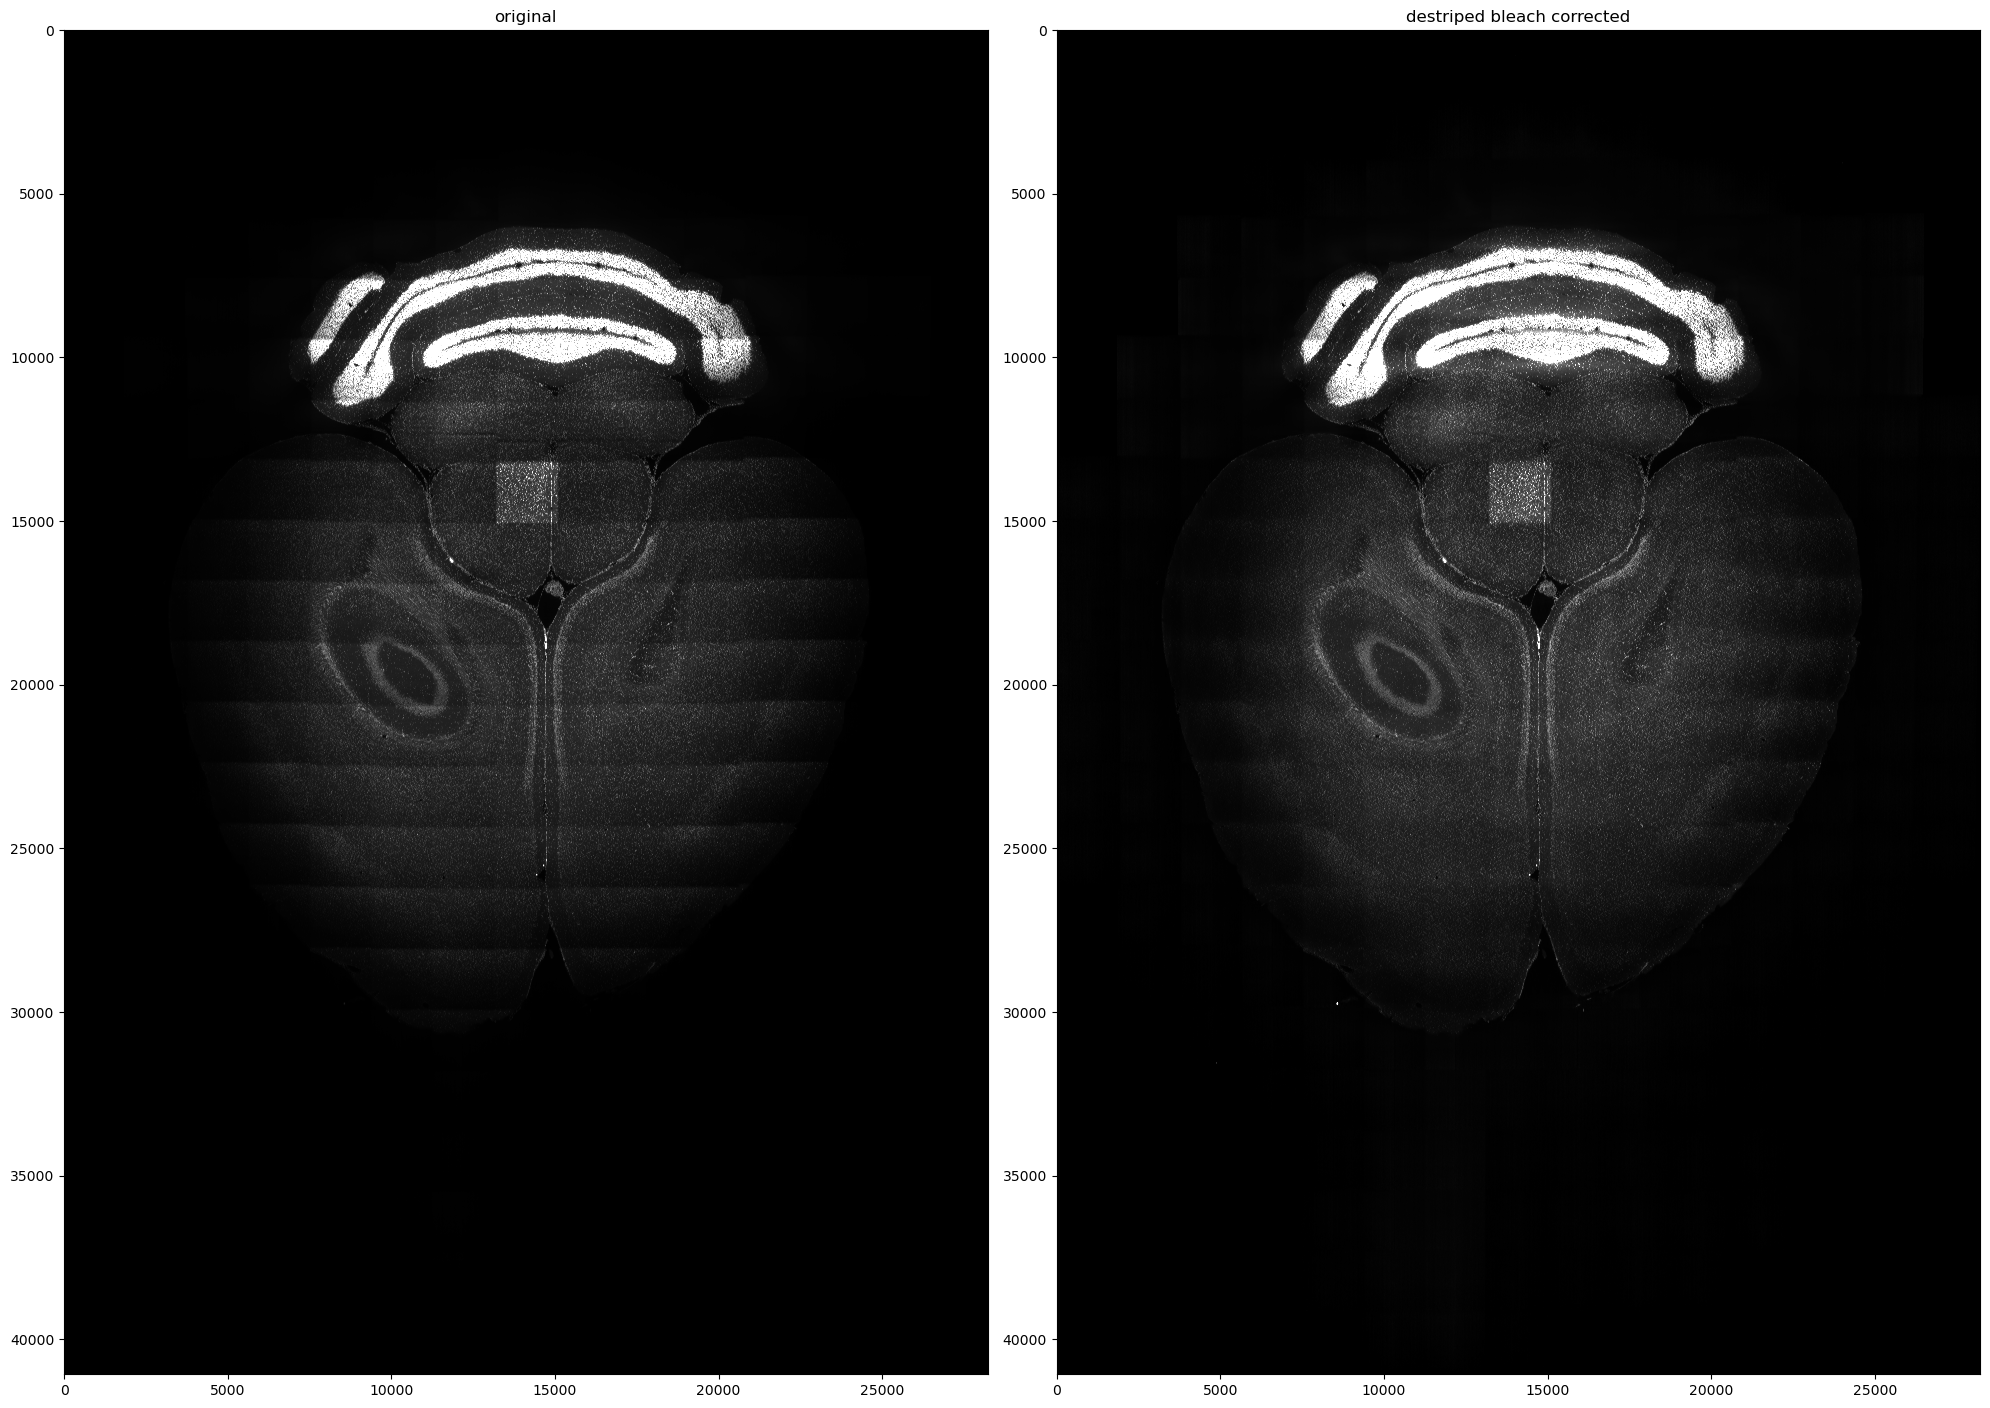

In [2]:
vmax = 1023
img_destriped = filter_streaks(img, sigma=(2000, 2000), bidirectional=True, bleach_correction_frequency=1/2000, bleach_correction_max_method=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
axes[0].imshow(img, cmap='gray', vmin=0, vmax=vmax)
axes[0].set_title("original")
axes[1].imshow(img_destriped, cmap='gray', vmin=0, vmax=vmax)
axes[1].set_title("destriped bleach corrected")
plt.tight_layout()
plt.show()
